## Luiz Berlandi| Finanças | ETFs x Fundos mútuos

### Introdução

O objetivo desse projeto é analisar o mercado financeiro e extrair informaçÕes importantes sobre fundos de investimentos tradicionais e ETFs, a diferença de tendência, preço e volume de negociações.

### Inciando a exportação de algumas das principais bibliotecas que iremos utilizar

In [2]:
# Instalar as bibliotecas necessárias (caso não tenham sido instaladas)
%pip install matplotlib scikit-learn pandas seaborn

# Importação de bibliotecas necessárias
import matplotlib.pyplot as plt  # Para visualização de gráficos
import seaborn as sns  # Para gráficos estatísticos
import pandas as pd  # Para processamento de dados
import numpy as np  # Para álgebra linear
import os  # Para acessar a estrutura de diretórios

# Bibliotecas de Machine Learning
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # Modelos de regressão
from sklearn.model_selection import train_test_split, GridSearchCV  # Divisão dos dados e busca por melhores parâmetros
from sklearn.metrics import mean_absolute_error, r2_score  # Métricas de avaliação de modelos

# modelos ou pré-processamento
from sklearn.preprocessing import StandardScaler  # Para normalização de dados
from sklearn.ensemble import RandomForestClassifier  # Exemplo de modelo de classificação


Note: you may need to restart the kernel to use updated packages.


In [2]:
print(os.listdir('../luizb/Portfolio/projetosAnaliseDeDados/Financas_etf_x_mutualFunds/1.dataset'))

['ETF prices.csv', 'ETFs.csv', 'MutualFund prices - A-E.csv', 'MutualFund prices - F-K.csv', 'MutualFund prices - L-P.csv', 'MutualFund prices - Q-Z.csv', 'MutualFunds.csv']


In [3]:
# Definindo variável do caminho para a pasta do dataset
dataset_path = '../luizb/Portfolio/projetosAnaliseDeDados/Financas_etf_x_mutualFunds/1.dataset'

# Verificando arquivos dentro do diretório dataset
print("Arquivos na pasta '1.dataset':", os.listdir(dataset_path))

# Inicialize csv_file_path como None
csv_file_path = None

# Busca pelo arquivo 'ETF prices.csv' no diretório 1.dataset
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        if filename == 'ETF prices.csv':
            csv_file_path = os.path.join(dirname, filename)
            print("Arquivo encontrado:", csv_file_path)
            break

# Verifica se o arquivo foi encontrado e prossegue
if csv_file_path:
    # Lê o arquivo CSV
    df = pd.read_csv(csv_file_path)
    print(df.head())
else:
    print("O arquivo 'ETF prices.csv' não foi encontrado.")

Arquivos na pasta '1.dataset': ['ETF prices.csv', 'ETFs.csv', 'MutualFund prices - A-E.csv', 'MutualFund prices - F-K.csv', 'MutualFund prices - L-P.csv', 'MutualFund prices - Q-Z.csv', 'MutualFunds.csv']
Arquivo encontrado: ../luizb/Portfolio/projetosAnaliseDeDados/Financas_etf_x_mutualFunds/1.dataset\ETF prices.csv
  fund_symbol  price_date   open   high    low  close  adj_close  volume
0         AAA  2020-09-09  25.10  25.12  25.07  25.07      24.85   17300
1         AAA  2020-09-10  25.06  25.07  25.05  25.07      24.85   23500
2         AAA  2020-09-11  25.04  25.05  25.02  25.03      24.81   33400
3         AAA  2020-09-14  25.01  25.06  25.01  25.02      24.80   13100
4         AAA  2020-09-15  25.02  25.03  25.01  25.01      24.79   12100


In [4]:
df.describe()

,open,high,low,close,adj_close,volume
count,3.866030e+06,3.866030e+06,3.866030e+06,3.866030e+06,3.866030e+06,3.866030e+06
mean,1.202537e+05,1.262811e+05,1.149734e+05,1.196726e+05,1.196579e+05,1.026745e+06
std,1.149917e+07,1.208270e+07,1.097204e+07,1.143655e+07,1.143655e+07,1.275733e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.486000e+01,2.494000e+01,2.476000e+01,2.485000e+01,2.229000e+01,3.553000e+03
50%,3.388000e+01,3.406000e+01,3.368000e+01,3.387000e+01,3.108000e+01,2.133900e+04
75%,5.417000e+01,5.441000e+01,5.390000e+01,5.416000e+01,5.007000e+01,1.269000e+05
max,2.656750e+09,2.808750e+09,2.609750e+09,2.808750e+09,2.808750e+09,2.987062e+09


In [5]:
df.info

<bound method DataFrame.info of         fund_symbol  price_date   open   high    low  close  adj_close  volume
0               AAA  2020-09-09  25.10  25.12  25.07  25.07      24.85   17300
1               AAA  2020-09-10  25.06  25.07  25.05  25.07      24.85   23500
2               AAA  2020-09-11  25.04  25.05  25.02  25.03      24.81   33400
3               AAA  2020-09-14  25.01  25.06  25.01  25.02      24.80   13100
4               AAA  2020-09-15  25.02  25.03  25.01  25.01      24.79   12100
...             ...         ...    ...    ...    ...    ...        ...     ...
3866025         ZSL  2021-11-23  26.81  27.21  26.30  26.35      26.35  190900
3866026         ZSL  2021-11-24  26.79  26.96  26.57  26.69      26.69  109000
3866027         ZSL  2021-11-26  26.67  28.14  26.67  27.72      27.72  205500
3866028         ZSL  2021-11-29  27.89  28.56  27.80  28.27      28.27  411900
3866029         ZSL  2021-11-30  28.15  28.73  25.91  28.49      28.49  219400

[3866030 rows x 8 c

In [6]:
print (df['fund_symbol'].value_counts())
#formatando o valor de saída de soma, por que? testando meu conhecimento.
print(f"{sum(df['fund_symbol'].value_counts()):,.0f}".replace(",", "."))

fund_symbol
SPY     7263
EWA     6472
EWD     6472
EWC     6472
DIA     6007
        ... 
BKCH      98
HVAL      95
VSPY      94
LOPX      92
JIDA      89
Name: count, Length: 2310, dtype: int64
3.866.030


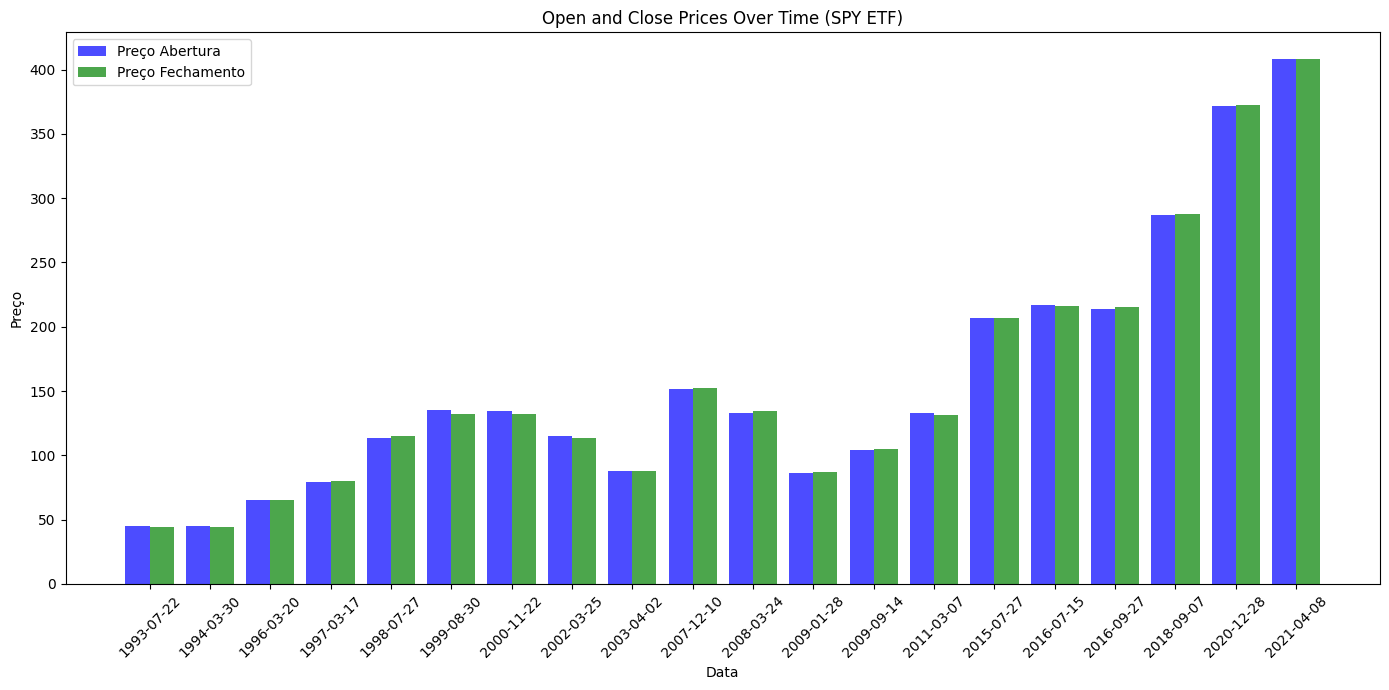

In [7]:
df['price_date'] = pd.to_datetime(df['price_date'])

spy_df = df[df['fund_symbol'] == 'SPY']

sample_spy_df = spy_df.sample(n=20, random_state=12)

sample_spy_df = sample_spy_df.sort_values(by='price_date')
bar_width = 0.4

x = range(len(sample_spy_df))

plt.figure(figsize=(14, 7))

plt.bar(x, sample_spy_df['open'], width=bar_width, label='Preço Abertura', color='blue', alpha=0.7)

plt.bar([p + bar_width for p in x], sample_spy_df['close'], width=bar_width, label='Preço Fechamento', color='green', alpha=0.7)

plt.title('Open and Close Prices Over Time (SPY ETF)')
plt.xlabel('Data')
plt.ylabel('Preço')

plt.xticks([p + bar_width / 2 for p in x], sample_spy_df['price_date'].dt.date, rotation=45)

plt.legend()

plt.tight_layout()

plt.show()

C:\Users\luizb\AppData\Local\Temp\ipykernel_22756\511919611.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fund_symbol', y='volume', data=avg_volume_per_fund, palette='muted')


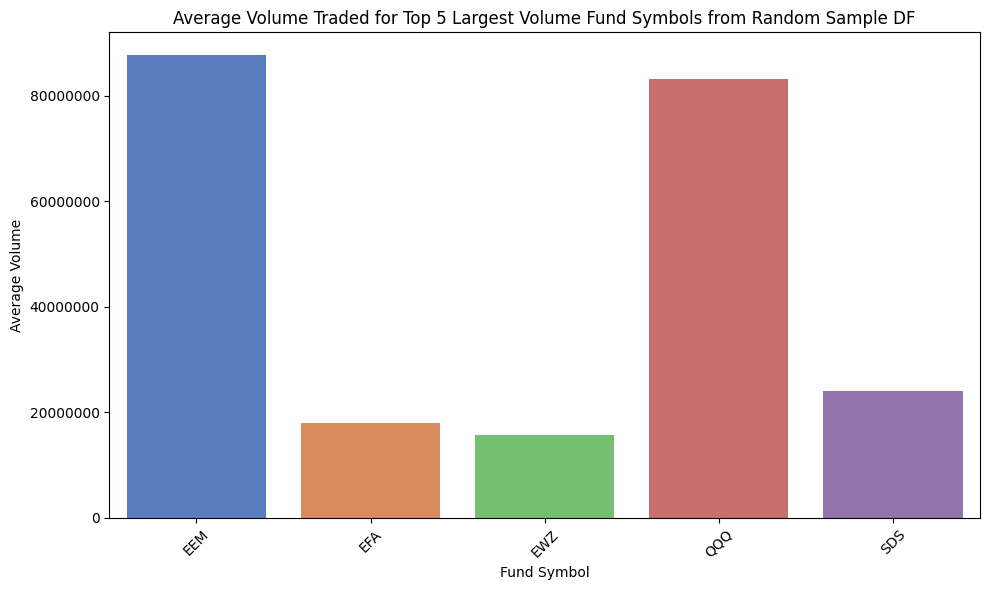

In [8]:
sample_df = df.sample(n=1000, random_state=12)
top_fund_symbols = sample_df.groupby('fund_symbol')['volume'].sum().nlargest(5).index

filtered_df = sample_df[sample_df['fund_symbol'].isin(top_fund_symbols)]

avg_volume_per_fund = filtered_df.groupby('fund_symbol')['volume'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='fund_symbol', y='volume', data=avg_volume_per_fund, palette='muted')

plt.title('Average Volume Traded for Top 5 Largest Volume Fund Symbols from Random Sample DF')
plt.xlabel('Fund Symbol')
plt.ylabel('Average Volume')
plt.xticks(rotation=45) 
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [9]:
df = df.drop_duplicates()
df = df.dropna()
etf_counts = df['fund_symbol'].value_counts()
valid_etfs = etf_counts[etf_counts >= 99].index
df = df[df['fund_symbol'].isin(valid_etfs)]
df.head(10)

,fund_symbol,price_date,open,high,low,close,adj_close,volume
0,AAA,2020-09-09,25.10,25.12,25.07,25.07,24.85,17300
1,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500
2,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400
3,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100
4,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100
5,AAA,2020-09-16,24.97,24.98,24.97,24.97,24.75,14100
6,AAA,2020-09-17,24.99,25.00,24.98,24.98,24.76,15200
7,AAA,2020-09-18,24.97,24.98,24.97,24.98,24.76,5300
8,AAA,2020-09-21,24.99,24.99,24.98,24.98,24.76,8600
9,AAA,2020-09-22,24.98,24.99,24.98,24.98,24.76,8100


In [10]:
null_values_open = df['open'].isnull().sum()
null_values_close = df['close'].isnull().sum()

zero_values_open = (df['open'] == 0).sum()
zero_values_close = (df['close'] == 0).sum()

print(f"Number of null or NaN values in 'open': {null_values_open}")
print(f"Number of null or NaN values in 'close': {null_values_close}")
print(f"Number of zero values in 'open': {zero_values_open}")
print(f"Number of zero values in 'close': {zero_values_close}")

Number of null or NaN values in 'open': 0
Number of null or NaN values in 'close': 0
Number of zero values in 'open': 8
Number of zero values in 'close': 8


In [11]:
zero_open_df = df[df['open'] == 0]
zero_close_df = df[df['close'] == 0]

print("Rows where 'open' is 0:")
print(zero_open_df)

print("\nRows where 'close' is 0:")
print(zero_close_df)

Rows where 'open' is 0:
        fund_symbol price_date  open  high  low  close  adj_close  volume
1142682        FLQL 2017-06-20   0.0   0.0  0.0    0.0        0.0       0
1143800        FLQM 2017-06-20   0.0   0.0  0.0    0.0        0.0       0
1144918        FLQS 2017-06-20   0.0   0.0  0.0    0.0        0.0       0
1388072        GIGB 2017-07-03   0.0   0.0  0.0    0.0        0.0       0
2105283        JPST 2017-06-23   0.0   0.0  0.0    0.0        0.0       0
3425630        TUSA 2014-12-23   0.0   0.0  0.0    0.0        0.0       0
3564346        USOI 2017-06-19   0.0   0.0  0.0    0.0        0.0       0
3689801        VSDA 2017-06-13   0.0   0.0  0.0    0.0        0.0       0

Rows where 'close' is 0:
        fund_symbol price_date  open  high  low  close  adj_close  volume
1142682        FLQL 2017-06-20   0.0   0.0  0.0    0.0        0.0       0
1143800        FLQM 2017-06-20   0.0   0.0  0.0    0.0        0.0       0
1144918        FLQS 2017-06-20   0.0   0.0  0.0    0.0        

In [12]:
df = df[(df['open'] != 0) & (df['close'] != 0)]

In [13]:
df['lag_open'] = df.groupby('fund_symbol')['open'].shift(1)
df['lag_close'] = df.groupby('fund_symbol')['close'].shift(1)
df = df.dropna()
df.head()

,fund_symbol,price_date,open,high,low,close,adj_close,volume,lag_open,lag_close
1,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500,25.10,25.07
2,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400,25.06,25.07
3,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100,25.04,25.03
4,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100,25.01,25.02
5,AAA,2020-09-16,24.97,24.98,24.97,24.97,24.75,14100,25.02,25.01


In [14]:
predictions = []
etfs = df['fund_symbol'].unique()

In [ ]:
predictions_df['price_change'] = predictions_df['pred_close'] - predictions_df['pred_open']
predictions_df['return_percentage'] = (predictions_df['price_change'] / predictions_df['pred_open']) * 100
predictions_df.head()